<a href="https://colab.research.google.com/github/laduqueo/Proyecto_Final_SyS/blob/main/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASE 1: Dominio de la frecuencia

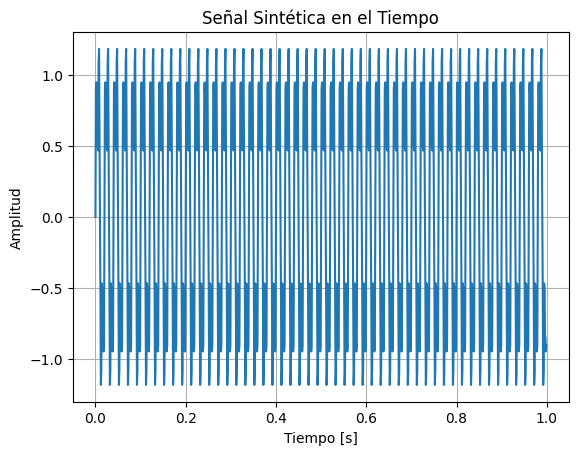

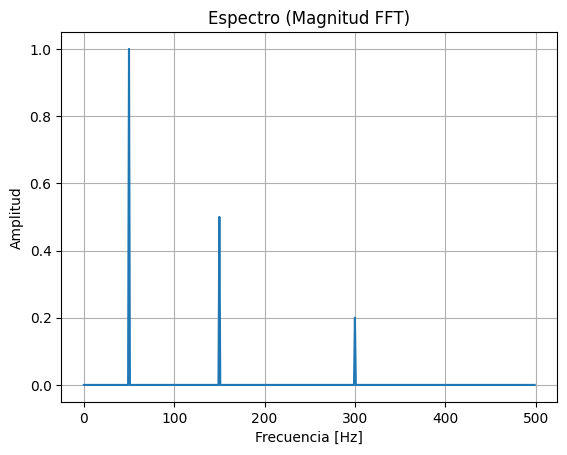

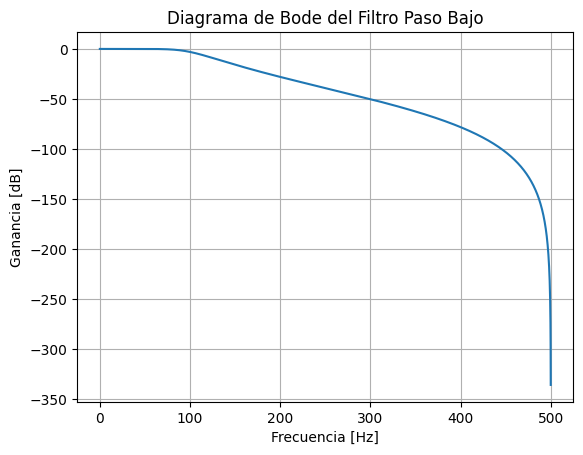

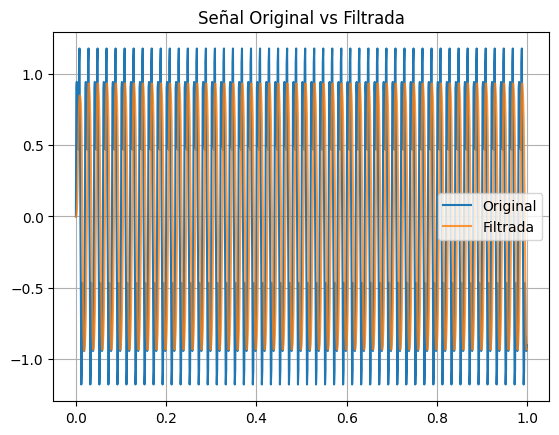

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

# Parámetros
fs = 1000  # Frecuencia de muestreo
T = 1.0    # Duración
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Señal sintética: suma de senoidales
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*150*t) + 0.2*np.sin(2*np.pi*300*t)

plt.figure()
plt.plot(t, x)
plt.title("Señal Sintética en el Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


X = fft(x)
f = fftfreq(len(t), 1/fs)

plt.figure()
plt.plot(f[:len(f)//2], 2/len(t)*np.abs(X[:len(X)//2]))
plt.title("Espectro (Magnitud FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()



# Diseño filtro Butterworth
b, a = butter(4, 0.2)  # 0.2 = 200Hz normalizado
w, h = freqz(b, a, worN=8000)

# Diagrama de Bode
plt.figure()
plt.plot(fs * 0.5 * w / np.pi, 20 * np.log10(abs(h)))
plt.title("Diagrama de Bode del Filtro Paso Bajo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Ganancia [dB]")
plt.grid()
plt.show()

# Aplicar filtro
x_filt = lfilter(b, a, x)

# Tiempo
plt.figure()
plt.plot(t, x, label='Original')
plt.plot(t, x_filt, label='Filtrada', alpha=0.8)
plt.title("Señal Original vs Filtrada")
plt.legend()
plt.grid()
plt.show()


#FASE 2: Construcción de eñales I/Q

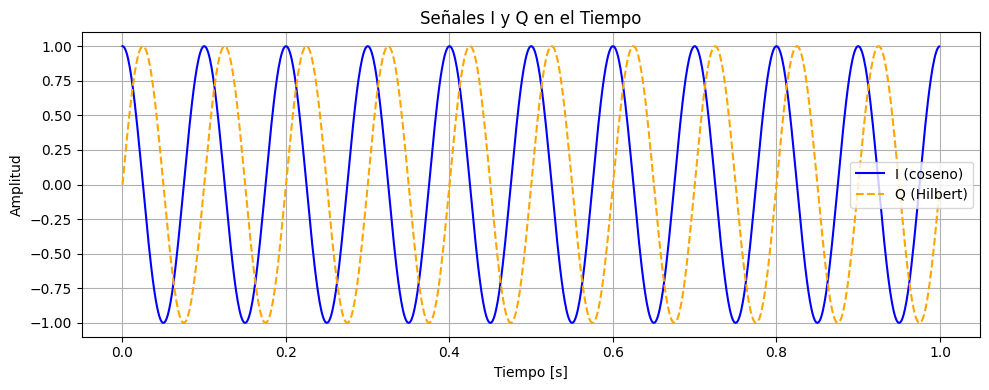

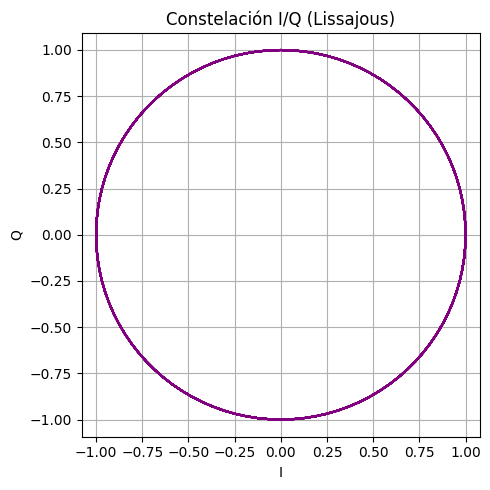

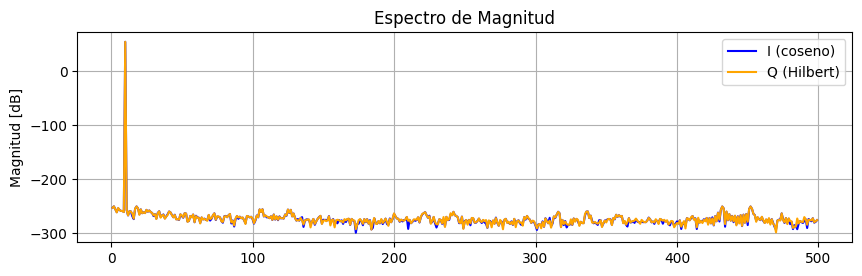

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq

# Parámetros
fs = 1000              # Frecuencia de muestreo
T = 1.0                  # Duración
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Señal I: coseno de 10 Hz
I = np.cos(2 * np.pi * 10 * t)

# Señal Q: Transformada de Hilbert de I
analytic_signal = hilbert(I)
Q = np.imag(analytic_signal)

# ------------------------------
# DOMINIO DEL TIEMPO
# ------------------------------
plt.figure(figsize=(10, 4))
plt.plot(t, I, label='I (coseno)', color='blue')
plt.plot(t, Q, label='Q (Hilbert)', color='orange', linestyle='--')
plt.title("Señales I y Q en el Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Diagrama de Lissajous (I vs Q)
plt.figure(figsize=(5, 5))
plt.plot(I, Q, color='purple')
plt.title("Constelación I/Q (Lissajous)")
plt.xlabel("I")
plt.ylabel("Q")
plt.grid()
plt.axis("equal")
plt.tight_layout()
plt.show()

# ------------------------------
# DOMINIO DE LA FRECUENCIA - Bode
# ------------------------------

# FFT de I y Q
N = len(t)
f = fftfreq(N, d=1/fs)
mask = f > 0  # Solo frecuencias positivas

I_fft = fft(I)
Q_fft = fft(Q)

# Magnitud y fase
plt.figure(figsize=(10, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(f[mask], 20 * np.log10(np.abs(I_fft[mask])), label='I (coseno)', color='blue')
plt.plot(f[mask], 20 * np.log10(np.abs(Q_fft[mask])), label='Q (Hilbert)', color='orange')
plt.ylabel("Magnitud [dB]")
plt.title("Espectro de Magnitud")
plt.grid(True)
plt.legend()


#FASE 3: Modulación 16-QAM

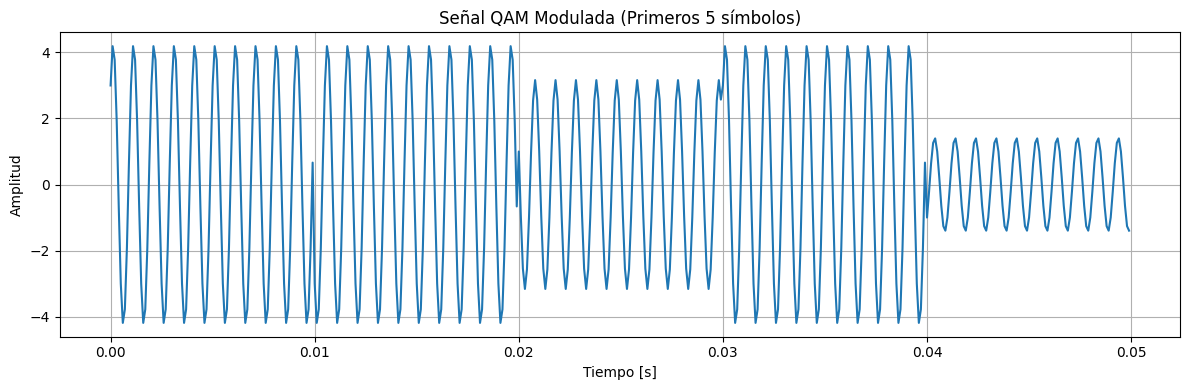

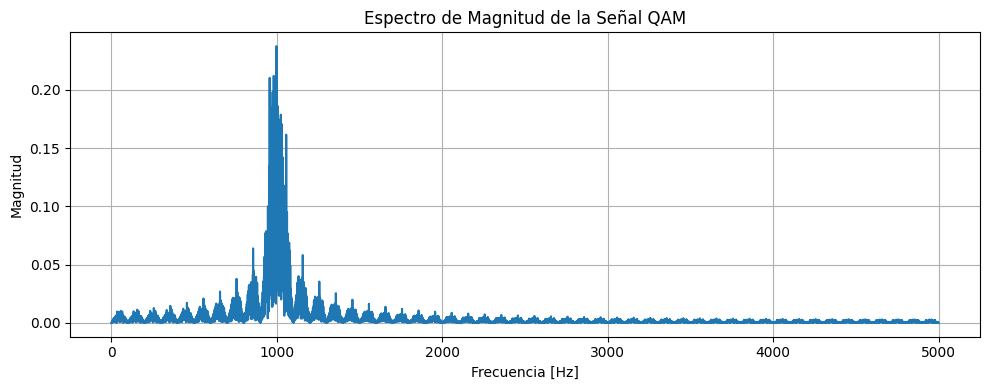

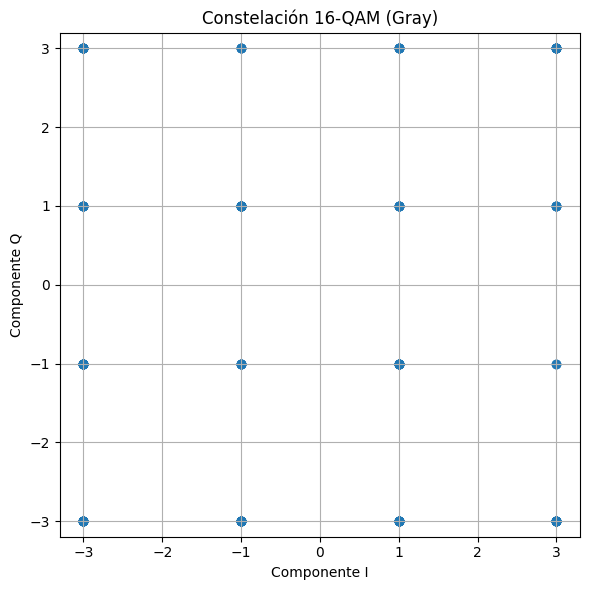

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# -------------------------
# Parámetros de simulación
# -------------------------
fs = 10000                 # Frecuencia de muestreo (Hz)
T_symbol = 0.01            # Duración de símbolo (s)
f_carrier = 1000           # Frecuencia de portadora (Hz)
samples_per_symbol = int(fs * T_symbol)
N = 200                    # Número de símbolos

# -------------------------
# 1. Mapeo 16-QAM Gray
# -------------------------
def qam16_gray_mapper(symbols):
    mapping = {
        0: (-3, -3),  1: (-3, -1),  2: (-3, +3),  3: (-3, +1),
        4: (-1, -3),  5: (-1, -1),  6: (-1, +3),  7: (-1, +1),
        8: (+3, -3),  9: (+3, -1), 10: (+3, +3), 11: (+3, +1),
        12: (+1, -3),13: (+1, -1),14: (+1, +3),15: (+1, +1)
    }
    return np.array([mapping[s] for s in symbols])

# -------------------------
# 2. Generar símbolos I y Q(t)
# -------------------------
symbols = np.random.randint(0, 16, N)
mapped = qam16_gray_mapper(symbols)
I_seq, Q_seq = mapped[:, 0], mapped[:, 1]

# Tren de pulsos para cada símbolo
I_t = np.repeat(I_seq, samples_per_symbol)
Q_t = np.repeat(Q_seq, samples_per_symbol)
t = np.linspace(0, T_symbol * N, samples_per_symbol * N, endpoint=False)

# -------------------------
# 3. Modulación QAM sobre portadora
# -------------------------
carrier_I = np.cos(2 * np.pi * f_carrier * t)
carrier_Q = np.sin(2 * np.pi * f_carrier * t)
qam_signal = I_t * carrier_I + Q_t * carrier_Q

# -------------------------
# 4. Visualizaciones requeridas
# -------------------------

# (a) Señal modulada en el tiempo
plt.figure(figsize=(12, 4))
plt.plot(t[:5*samples_per_symbol], qam_signal[:5*samples_per_symbol])
plt.title("Señal QAM Modulada (Primeros 5 símbolos)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Espectro de la señal QAM
n = len(qam_signal)
f = fftfreq(n, 1/fs)
spectrum = np.abs(fft(qam_signal)) / n

plt.figure(figsize=(10, 4))
plt.plot(f[:n//2], spectrum[:n//2])
plt.title("Espectro de Magnitud de la Señal QAM")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# (c) Diagrama de constelación
plt.figure(figsize=(6, 6))
plt.scatter(I_seq, Q_seq, alpha=0.7)
plt.title("Constelación 16-QAM (Gray)")
plt.xlabel("Componente I")
plt.ylabel("Componente Q")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

#FASE 4: Sistema completo

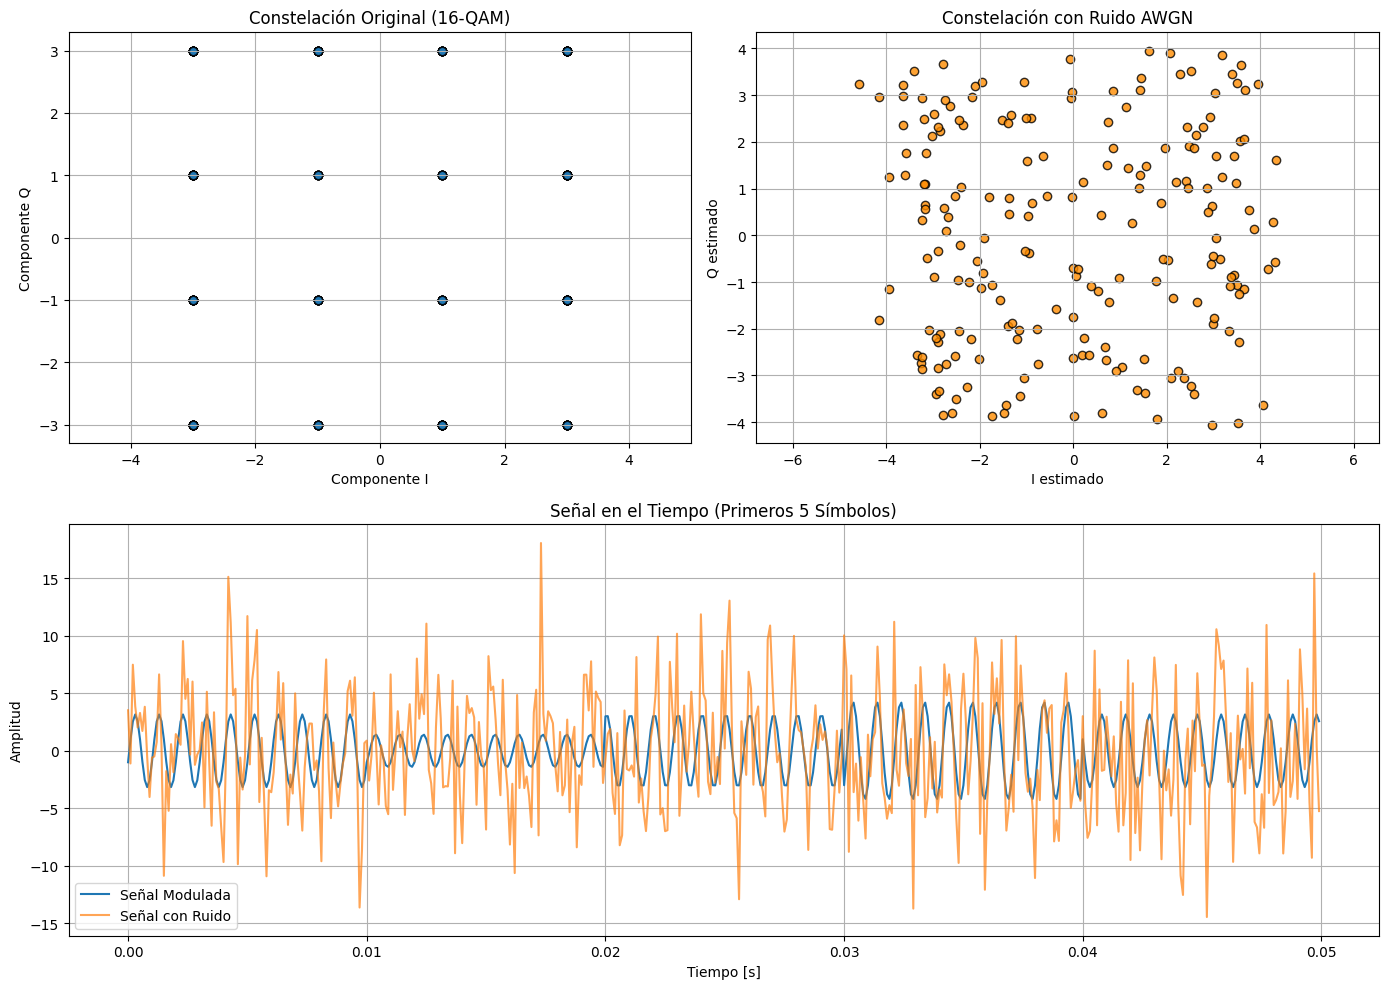

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros
fs = 10000
f_carrier = 1000
T_symbol = 0.01
samples_per_symbol = int(fs * T_symbol)
N = 200  # Número de símbolos
EbN0_dB = 25  # Nivel de ruido en dB

# Mapeo Gray 16-QAM
def qam16_gray_mapper(symbols):
    mapping = {
        0: (-3, -3),  1: (-3, -1),  2: (-3, +3),  3: (-3, +1),
        4: (-1, -3),  5: (-1, -1),  6: (-1, +3),  7: (-1, +1),
        8: (+3, -3),  9: (+3, -1), 10: (+3, +3), 11: (+3, +1),
        12: (+1, -3), 13: (+1, -1),14: (+1, +3), 15: (+1, +1)
    }
    return np.array([mapping[s] for s in symbols])

# Generación de símbolos aleatorios
symbols = np.random.randint(0, 16, N)
mapped = qam16_gray_mapper(symbols)
I_seq = mapped[:, 0]
Q_seq = mapped[:, 1]

# Portadoras
t_symbol = np.linspace(0, T_symbol, samples_per_symbol, endpoint=False)
carrier_I = np.cos(2 * np.pi * f_carrier * t_symbol)
carrier_Q = np.sin(2 * np.pi * f_carrier * t_symbol)

# Señal modulada
modulated = np.concatenate([
    i * carrier_I + q * carrier_Q for i, q in zip(I_seq, Q_seq)
])

# Añadir ruido AWGN (de forma realista)
def awgn(x, EbN0_dB, bits_per_symbol=4, fs=1):
    Es = np.mean(np.abs(x)**2)
    Eb = Es / bits_per_symbol
    N0 = Eb / (10**(EbN0_dB / 10))
    sigma = np.sqrt(N0 * fs / 2)
    ruido = np.random.normal(0, sigma, len(x))
    return x + ruido

modulada_con_ruido = awgn(modulated, EbN0_dB, fs=fs)

# Demodulación
def demodulate(signal, fs, f_carrier, T_symbol, N):
    sps = int(T_symbol * fs)
    t = np.linspace(0, T_symbol, sps, endpoint=False)
    I_carrier = np.cos(2 * np.pi * f_carrier * t)
    Q_carrier = np.sin(2 * np.pi * f_carrier * t)

    I_demod, Q_demod = [], []
    for i in range(N):
        segmento = signal[i*sps:(i+1)*sps]
        I = 2 * np.sum(segmento * I_carrier) / sps
        Q = 2 * np.sum(segmento * Q_carrier) / sps
        I_demod.append(I)
        Q_demod.append(Q)
    return np.array(I_demod), np.array(Q_demod)

I_hat, Q_hat = demodulate(modulada_con_ruido, fs, f_carrier, T_symbol, N)

# Gráficas
plt.figure(figsize=(14, 10))

# 1. Constelación original
plt.subplot(2, 2, 1)
plt.scatter(I_seq, Q_seq, alpha=0.8, edgecolors='k')
plt.title("Constelación Original (16-QAM)")
plt.xlabel("Componente I")
plt.ylabel("Componente Q")
plt.grid(True)
plt.axis("equal")

# 2. Constelación después del canal
plt.subplot(2, 2, 2)
plt.scatter(I_hat, Q_hat, alpha=0.8, color='darkorange', edgecolors='k')
plt.title("Constelación con Ruido AWGN")
plt.xlabel("I estimado")
plt.ylabel("Q estimado")
plt.grid(True)
plt.axis("equal")

# 3. Señales en el tiempo (5 símbolos)
plt.subplot(2, 1, 2)
samples_plot = 5 * samples_per_symbol
t_plot = np.linspace(0, 5 * T_symbol, samples_plot, endpoint=False)
plt.plot(t_plot, modulated[:samples_plot], label='Señal Modulada')
plt.plot(t_plot, modulada_con_ruido[:samples_plot], label='Señal con Ruido', alpha=0.7)
plt.title("Señal en el Tiempo (Primeros 5 Símbolos)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

